In [17]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import yaml
from tqdm import *

from components import Robot, robot_from_dna, Coevolution

# Import Settings

In [18]:
with open("config.yaml", "r") as yamlfile:
    config = yaml.safe_load(yamlfile)

pop_size = config['pop_size'] # number of robots per generation
num_breeders = config['num_breeders'] # number of robots who can mate in each generation
num_gen = config['num_generations'] # total number of generations
iter_per_sim = config['iterations_per_simulation'] # number of rubbish-collection simulations per robot
moves_per_iter = config['moves_per_iteration'] # number of moves robot can make per simulation
print(pop_size,num_breeders,num_gen,iter_per_sim,moves_per_iter)

200 100 500 100 200


In [4]:
robot_one = Robot()
robot_two = Robot()

coevolution = Coevolution(robot_one,robot_two)
result = coevolution.simulate(5,5)

In [5]:
result

(-3.549, 1.8889999999999998, -1.66)

# Run Co-evolution

In [ ]:
# initial population
pop_one = [Robot() for x in range(pop_size)]
pop_two = [Robot() for x in range(pop_size)]
results_one = []
results_two = []
results_system = []

# run evolution
for i in tqdm(range(num_gen)):
    scores_one = np.zeros(pop_size)
    scores_two = np.zeros(pop_size)
    scores_system = np.zeros(pop_size)
    # iterate through all robots
    for idx in range(len(pop_one)):
    # run rubbish collection simulation and calculate fitness
        coevolution = Coevolution(pop_one[idx],pop_two[idx])
        score_one,score_two,system = coevolution.simulate(iter_per_sim, moves_per_iter)
        scores_one[idx] = score_one
        scores_two[idx] = score_two
        scores_system[idx] = system
  
    results_one.append([scores_one.mean(),scores_one.max()]) # save mean and max scores for each generation
    results_two.append([scores_two.mean(),scores_two.max()]) # save mean and max scores for each generation
    results_system.append([scores_system.mean(),scores_system.max()]) # save mean and max scores for each generation
    print(scores_one.max(),scores_two.max())
    best_robot_one = pop_one[scores_one.argmax()] # save the best robot
    best_robot_two = pop_two[scores_two.argmax()] # save the best robot

    # limit robots who are able to mate to top num_breeders
    inds_one = np.argpartition(scores_one, -num_breeders)[-num_breeders:] # get indices of top robots based on fitness
    inds_two = np.argpartition(scores_two, -num_breeders)[-num_breeders:] # get indices of top robots based on fitness
    subpop_one = []
    subpop_two = []
    for i in range(len(inds_one)):
        subpop_one.append(pop_one[inds_one[i]])
        subpop_two.append(pop_two[inds_two[i]])
        
    scores_one = scores_one[inds_one]
    scores_two = scores_two[inds_two]

    # square and normalise fitness scores
    norm_scores_one = (scores_one - scores_one.min()) ** 2
    norm_scores_one = norm_scores_one / norm_scores_one.sum()

    norm_scores_two = (scores_two - scores_two.min()) ** 2
    norm_scores_two = norm_scores_two / norm_scores_two.sum()

    # create next generation of robots
    new_pop_one = []
    new_pop_two = []
    for child in range(pop_size):
        p1, p2 = np.random.choice(subpop_one, p=norm_scores_one, size=2, replace=False)
        p3, p4 = np.random.choice(subpop_two, p=norm_scores_two, size=2, replace=False)
        new_pop_one.append(Robot(p1.dna, p2.dna))
        new_pop_two.append(Robot(p3.dna, p4.dna))

    pop_one = new_pop_one
    pop_two = new_pop_two

 22%|█████████████████▎                                                           | 90/400 [1:24:34<5:57:15, 69.15s/it]

# Visualise Results

### Read the last N lines with the robot´s output

In [19]:
# Function to read 
# last N lines of the file  
def LastNlines(fname, N): 
    # opening file using with() method 
    # so that file get closed 
    # after completing work 
    lines = []
    with open(fname) as file: 
          
        # loop to read iterate  
        # last n lines and print it 
        for line in (file.readlines() [-N:]): 
            lines += [line]
    return lines 


# Experimento 1

Scores A -143.925 3.0
Scores B -120.155 2.0


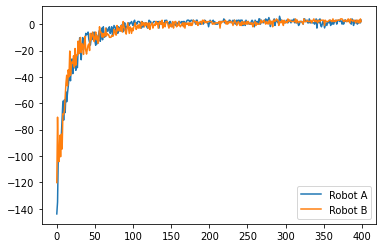

In [45]:
# -5 (wall) if they collide and -2.5 if they pick up the wrong can
lines =  LastNlines('Experiment outputs/output.txt', 4) 
scores_one = np.array(eval(lines[0]))
scores_two = np.array(eval(lines[1]))

plt.plot(np.arange(len(scores_one)), scores_one[:,1],label = 'Robot A')
plt.plot(np.arange(len(scores_two)), scores_two[:,1], label = 'Robot B')
plt.legend()
print('Scores A' , scores_one[0][1],  scores_one[-1][1])
print('Scores B' , scores_two[0][1],  scores_two[-1][1])

# Experimento 2

Scores A -188.4 3.0
Scores B -204.68 3.0


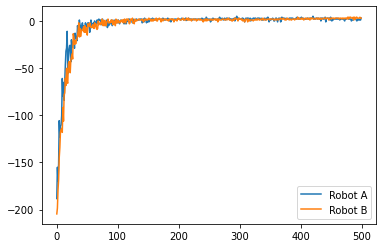

In [46]:
# -2 if they collide and -2.5 if they pick up the wrong can
lines =  LastNlines('Experiment outputs/output_1.txt', 4) 
scores_one = np.array(eval(lines[0]))
scores_two = np.array(eval(lines[1]))

plt.plot(np.arange(len(scores_one)), scores_one[:,1],label = 'Robot A')
plt.plot(np.arange(len(scores_two)), scores_two[:,1], label = 'Robot B')
plt.legend()
print('Scores A' , scores_one[0][1],  scores_one[-1][1])
print('Scores B' , scores_two[0][1],  scores_two[-1][1])

# Experimento 3

Scores A -115.515 3.44
Scores B -98.435 3.0


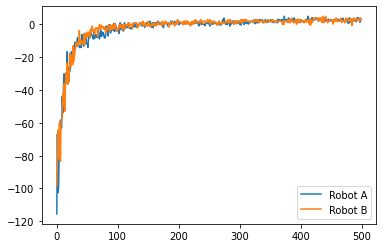

In [48]:
# -2 if they collide and -0.5 if they pick up the wrong can
lines =  LastNlines('Experiment outputs/output_2.txt', 4) 
scores_one = np.array(eval(lines[0]))
scores_two = np.array(eval(lines[1]))

plt.plot(np.arange(len(scores_one)), scores_one[:,1],label = 'Robot A')
plt.plot(np.arange(len(scores_two)), scores_two[:,1], label = 'Robot B')
plt.legend()
print('Scores A' , scores_one[0][1],  scores_one[-1][1])
print('Scores B' , scores_two[0][1],  scores_two[-1][1])

# Experimento 4

Scores A -81.0 4.0
Scores B -60.0 5.0


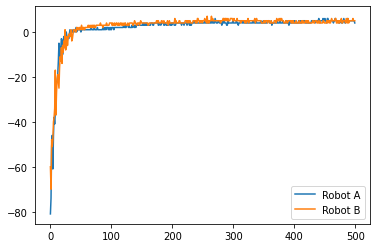

In [49]:
# 0 if they collide and 0 if they pick up the wrong can
lines =  LastNlines('Experiment outputs/output_3.txt', 4) 
scores_one = np.array(eval(lines[0]))
scores_two = np.array(eval(lines[1]))

plt.plot(np.arange(len(scores_one)), scores_one[:,1],label = 'Robot A')
plt.plot(np.arange(len(scores_two)), scores_two[:,1], label = 'Robot B')
plt.legend()
print('Scores A' , scores_one[0][1],  scores_one[-1][1])
print('Scores B' , scores_two[0][1],  scores_two[-1][1])

# Experimento 5

Scores A -85.96600000000001 10.310999999999996
Scores B -89.09999999999995 6.311999999999999


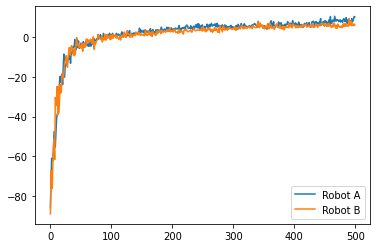

In [50]:
# making the robots different, wrong can penalty A = -0.5, B = -0.6, colliding A = -0.7, B = -0.8
lines =  LastNlines('Experiment outputs/output_4.txt', 4) 
scores_one = np.array(eval(lines[0]))
scores_two = np.array(eval(lines[1]))

plt.plot(np.arange(len(scores_one)), scores_one[:,1],label = 'Robot A')
plt.plot(np.arange(len(scores_two)), scores_two[:,1], label = 'Robot B')
plt.legend()
print('Scores A' , scores_one[0][1],  scores_one[-1][1])
print('Scores B' , scores_two[0][1],  scores_two[-1][1])

# Experimento 6

Scores A -89.5011 7.712200000000001
Scores B -88.80959999999997 8.287600000000007


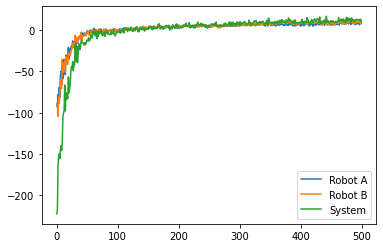

In [51]:
# making the robots different, wrong can penalty A = -0.5, B = -0.6, colliding A = -0.7, B = -0.8, system reward 
# 10%  
lines =  LastNlines('Experiment outputs/output_5.txt', 5) 
scores_one = np.array(eval(lines[0]))
scores_two = np.array(eval(lines[1]))
scores_system = np.array(eval(lines[2]))

plt.plot(np.arange(len(scores_one)), scores_one[:,1],label = 'Robot A')
plt.plot(np.arange(len(scores_two)), scores_two[:,1], label = 'Robot B')
plt.plot(np.arange(len(scores_system)), scores_system[:,1], label = 'System')
plt.legend()
print('Scores A' , scores_one[0][1],  scores_one[-1][1])
print('Scores B' , scores_two[0][1],  scores_two[-1][1])

Scores A -127.08124999999998 9.011550000000003
Scores B -47.33529999999993 8.712500000000004


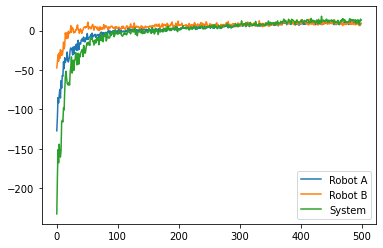

In [52]:
# making the robots different, wrong can penalty A = -0.5, B = -0.6, colliding A = -0.7, B = -0.8, system reward 
#  A = 15 % and penalty B = -15 %
lines =  LastNlines('Experiment outputs/output_6.txt', 5) 
scores_one = np.array(eval(lines[0]))
scores_two = np.array(eval(lines[1]))
scores_system = np.array(eval(lines[2]))

plt.plot(np.arange(len(scores_one)), scores_one[:,1],label = 'Robot A')
plt.plot(np.arange(len(scores_two)), scores_two[:,1], label = 'Robot B')
plt.plot(np.arange(len(scores_system)), scores_system[:,1], label = 'System')
plt.legend()
print('Scores A' , scores_one[0][1],  scores_one[-1][1])
print('Scores B' , scores_two[0][1],  scores_two[-1][1])

# Compare with Benchmark
I crafted the dna string below as a benchmark. The strategy is:
* if rubbish is in square, pick it up
* if rubbish is visible, move to that square
* if next to a wall, move away from it
* otherwise move in a random direction

We can see that the robots that "evolved" using the genetic algorithm are superior to my benchmark strategy.

In [40]:
#benchmark_dna = '226226336226226336226226226226226336226226336226226226116116116116116116116116116336336336336336336226226226006006336116556336226226226116116116116116116116116116006006006006006006006006006006006006006006006006006006006006006006006006006006006'
#test = robot_from_dna(benchmark_dna)
#test_result = test.simulate(100,200)
#ga_result = best_robot.simulate(100,200)
#print('Benchmark Ave Score:',test_result)
#print('Evolved Ave Score:',ga_result)

# Number of steps

In [41]:
robot_A = robot_from_dna(lines[0][:-1])
robot_B = robot_from_dna(lines[1][:-1])
coevolution = Coevolution(robot_A,robot_B)
times = []
for i in range(1000):
    total_scores = []
    for j in range(1,1000,50):
        scores = coevolution.simulate(1, j)
        sum_ = scores[0]+scores[1]
        total_scores += [sum_]
    times += [list(total_scores).index(max(total_scores))]



In [5]:
import collections
counter=collections.Counter(times)

In [6]:
counter

Counter({0: 14,
         6: 48,
         1: 112,
         2: 92,
         12: 33,
         9: 39,
         8: 55,
         3: 88,
         11: 45,
         16: 35,
         10: 42,
         14: 37,
         13: 37,
         5: 65,
         18: 29,
         4: 90,
         15: 28,
         19: 24,
         17: 32,
         7: 55})